In [96]:
# all imports
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
import keras
from keras import optimizers
from keras.optimizers import Adam, RMSprop, SGD
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import utils
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import numpy as np

In [48]:
# downloading the data
(train_x, train_y), (test_x, test_y) = fashion_mnist.load_data()
train_x, test_x = train_x / 255.0, test_x / 255.0

### Adam

In [49]:
# Functions for creating and training model
def create_model():
    model = models.Sequential([
        layers.Flatten(input_shape=(28, 28)),
        layers.Dense(512, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(10, activation='softmax')
    ])
    return model

def train_model_adam(model, epochs=100):
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)
    history = model.fit(train_x, train_y, epochs=epochs, batch_size=256, validation_split=0.2, verbose=1, callbacks=[reduce_lr])

    return history


In [50]:
# Create the first model (adam optimization)
model_adam_optim = create_model()
history_adam = train_model_adam(model_adam_optim)


Epoch 1/100
188/188 [==============================] - 2s 9ms/step - loss: 0.6509 - accuracy: 0.7707 - val_loss: 0.4225 - val_accuracy: 0.8462 - lr: 0.0010
Epoch 2/100
188/188 [==============================] - 2s 8ms/step - loss: 0.4233 - accuracy: 0.8469 - val_loss: 0.3812 - val_accuracy: 0.8622 - lr: 0.0010
Epoch 3/100
188/188 [==============================] - 2s 9ms/step - loss: 0.3781 - accuracy: 0.8625 - val_loss: 0.3811 - val_accuracy: 0.8612 - lr: 0.0010
Epoch 4/100
188/188 [==============================] - 2s 9ms/step - loss: 0.3546 - accuracy: 0.8708 - val_loss: 0.3433 - val_accuracy: 0.8792 - lr: 0.0010
Epoch 5/100
188/188 [==============================] - 2s 8ms/step - loss: 0.3391 - accuracy: 0.8757 - val_loss: 0.3503 - val_accuracy: 0.8734 - lr: 0.0010
Epoch 6/100
188/188 [==============================] - 2s 9ms/step - loss: 0.3198 - accuracy: 0.8823 - val_loss: 0.3314 - val_accuracy: 0.8794 - lr: 0.0010
Epoch 7/100
188/188 [==============================] - 2s 9ms/st

188/188 [==============================] - 2s 9ms/step - loss: 0.1388 - accuracy: 0.9469 - val_loss: 0.3494 - val_accuracy: 0.8981 - lr: 0.0010
Epoch 54/100
188/188 [==============================] - 2s 9ms/step - loss: 0.1390 - accuracy: 0.9463 - val_loss: 0.3564 - val_accuracy: 0.8992 - lr: 0.0010
Epoch 55/100
188/188 [==============================] - 2s 10ms/step - loss: 0.1398 - accuracy: 0.9474 - val_loss: 0.3451 - val_accuracy: 0.9009 - lr: 0.0010
Epoch 56/100
188/188 [==============================] - 2s 9ms/step - loss: 0.1345 - accuracy: 0.9484 - val_loss: 0.3461 - val_accuracy: 0.9032 - lr: 0.0010
Epoch 57/100
188/188 [==============================] - 2s 9ms/step - loss: 0.1356 - accuracy: 0.9477 - val_loss: 0.3553 - val_accuracy: 0.9011 - lr: 0.0010
Epoch 58/100
188/188 [==============================] - 2s 9ms/step - loss: 0.1353 - accuracy: 0.9484 - val_loss: 0.3520 - val_accuracy: 0.9010 - lr: 0.0010
Epoch 59/100
188/188 [==============================] - 2s 9ms/step - 

313/313 [==============================] - 0s 1ms/step - loss: 0.4435 - accuracy: 0.8972
Accurancy on test data optimizer_Adam 0.8971999883651733
Loss on test data optimizer_Adam 0.44346514344215393
1875/1875 [==============================] - 2s 923us/step - loss: 0.1276 - accuracy: 0.9633
Accurancy on train data optimizer_Adam: 0.9632999897003174
Loss on train data optimizer_Adam: 0.12758523225784302


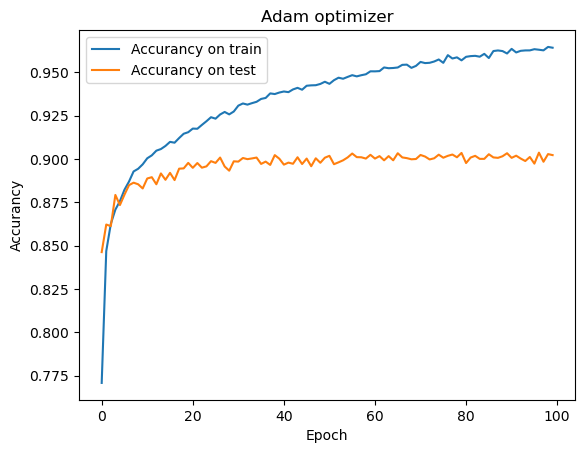

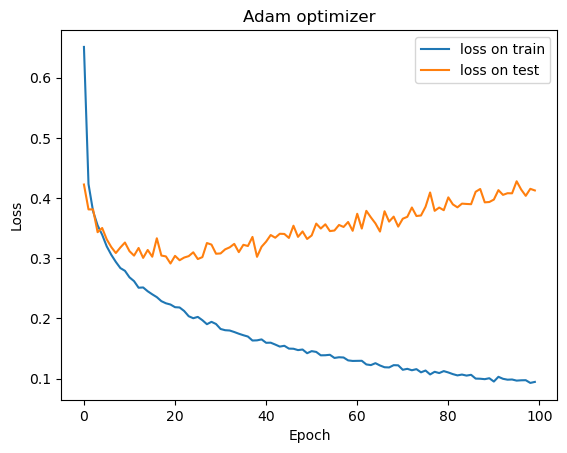

In [62]:
# Visualization of result and fing loss and accuracy - Adam optimazer

test_loss, test_acc = model_adam_optim.evaluate(test_x, test_y)
print('Accurancy on test data optimizer_Adam', test_acc)
print('Loss on test data optimizer_Adam', test_loss)

train_loss, train_acc = model_adam_optim.evaluate(train_x, train_y)
print('Accurancy on train data optimizer_Adam:', train_acc)
print('Loss on train data optimizer_Adam:', train_loss)

plt.plot(history_adam.history['accuracy'], label='Accurancy on train')
plt.plot(history_adam.history['val_accuracy'], label='Accurancy on test')
plt.xlabel('Epoch')
plt.ylabel('Accurancy')
plt.title('Adam optimizer')
plt.legend()
plt.show()

plt.plot(history_adam.history['loss'], label='loss on train')
plt.plot(history_adam.history['val_loss'], label='loss on test')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Adam optimizer')
plt.legend()
plt.show()

### RMSprop

In [84]:
# Train (study) funcion for RMS model
def train_model_rmsprop(model, epochs=100):
    model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    early_stopping = EarlyStopping(monitor='val_accuracy', patience=6, restore_best_weights=True)
    history = model.fit(train_x, train_y, epochs=epochs, batch_size=64, validation_split=0.2, callbacks=[early_stopping])
    return history

In [85]:
# Create second model RMS

model_rms = create_model()
history_rmsprop = train_model_rmsprop(model_rms)

Epoch 1/100
750/750 [==============================] - 4s 5ms/step - loss: 0.6002 - accuracy: 0.7824 - val_loss: 0.4393 - val_accuracy: 0.8330
Epoch 2/100
750/750 [==============================] - 4s 5ms/step - loss: 0.4438 - accuracy: 0.8396 - val_loss: 0.3850 - val_accuracy: 0.8627
Epoch 3/100
750/750 [==============================] - 4s 5ms/step - loss: 0.4175 - accuracy: 0.8549 - val_loss: 0.3832 - val_accuracy: 0.8679
Epoch 4/100
750/750 [==============================] - 3s 5ms/step - loss: 0.4123 - accuracy: 0.8588 - val_loss: 0.3888 - val_accuracy: 0.8657
Epoch 5/100
750/750 [==============================] - 4s 5ms/step - loss: 0.4051 - accuracy: 0.8620 - val_loss: 0.3865 - val_accuracy: 0.8629
Epoch 6/100
750/750 [==============================] - 4s 5ms/step - loss: 0.4015 - accuracy: 0.8649 - val_loss: 0.3991 - val_accuracy: 0.8698
Epoch 7/100
750/750 [==============================] - 3s 5ms/step - loss: 0.3970 - accuracy: 0.8664 - val_loss: 0.4793 - val_accuracy: 0.8585

In [86]:
# Find accuracy and loss for model RMS
test_loss, test_acc = model_rms.evaluate(test_x, test_y)
print('Accurancy on test data optimizer_RMSprop', test_acc)
print('Loss on test data optimizer_RMSprop', test_loss)

train_loss, train_acc = model_rms.evaluate(train_x, train_y)
print('Accurancy on train data optimizer_RMSprop :', train_acc)
print('Loss on train data optimizer_RMSprop:', train_loss)

313/313 [==============================] - 0s 929us/step - loss: 0.5296 - accuracy: 0.8733
Accurancy on test data optimizer_RMSprop 0.8733000159263611
Loss on test data optimizer_RMSprop 0.5295857191085815
1875/1875 [==============================] - 2s 894us/step - loss: 0.3051 - accuracy: 0.9014
Accurancy on train data optimizer_RMSprop : 0.9013500213623047
Loss on train data optimizer_RMSprop: 0.30512794852256775


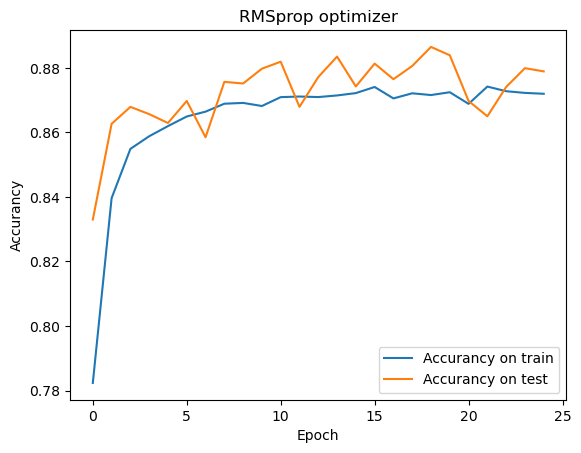

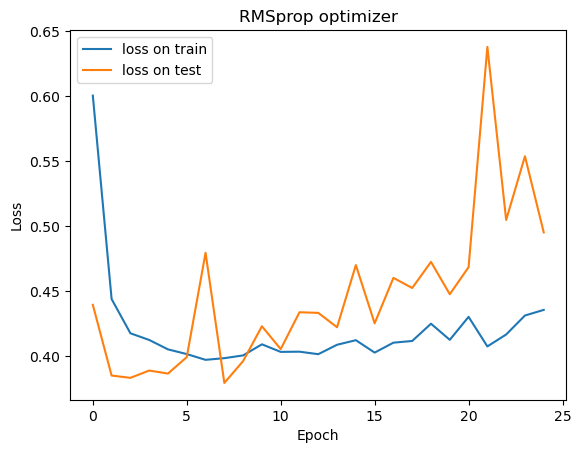

In [87]:
# Visualize result (accuracy and loss) for RMS optimazer

plt.plot(history_rmsprop.history['accuracy'], label='Accurancy on train')
plt.plot(history_rmsprop.history['val_accuracy'], label='Accurancy on test')
plt.xlabel('Epoch')
plt.ylabel('Accurancy')
plt.title('RMSprop optimizer')
plt.legend()
plt.show()

plt.plot(history_rmsprop.history['loss'], label='loss on train')
plt.plot(history_rmsprop.history['val_loss'], label='loss on test')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('RMSprop optimizer')
plt.legend()
plt.show()


### SGD

In [79]:
# Study function for SGD optimizator 
def train_model_sgd(model, epochs=100):
    model.compile(optimizer='sgd',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

    early_stopping = EarlyStopping(monitor='val_accuracy', patience=6, restore_best_weights=True)
    history = model.fit(train_x, train_y, epochs=epochs, batch_size=64, validation_split=0.2, callbacks=[early_stopping])

    return history

In [80]:
# create SGD model
model_sgd = create_model()
history_sgd = train_model_sgd(model_sgd)

Epoch 1/100
750/750 [==============================] - 3s 3ms/step - loss: 1.0730 - accuracy: 0.6236 - val_loss: 0.6315 - val_accuracy: 0.7797
Epoch 2/100
750/750 [==============================] - 2s 3ms/step - loss: 0.6695 - accuracy: 0.7645 - val_loss: 0.5310 - val_accuracy: 0.8133
Epoch 3/100
750/750 [==============================] - 2s 3ms/step - loss: 0.5848 - accuracy: 0.7974 - val_loss: 0.4871 - val_accuracy: 0.8288
Epoch 4/100
750/750 [==============================] - 2s 3ms/step - loss: 0.5358 - accuracy: 0.8135 - val_loss: 0.4588 - val_accuracy: 0.8352
Epoch 5/100
750/750 [==============================] - 3s 4ms/step - loss: 0.4985 - accuracy: 0.8264 - val_loss: 0.4373 - val_accuracy: 0.8418
Epoch 6/100
750/750 [==============================] - 3s 4ms/step - loss: 0.4736 - accuracy: 0.8345 - val_loss: 0.4198 - val_accuracy: 0.8488
Epoch 7/100
750/750 [==============================] - 3s 4ms/step - loss: 0.4547 - accuracy: 0.8386 - val_loss: 0.4078 - val_accuracy: 0.8535

Epoch 58/100
750/750 [==============================] - 2s 3ms/step - loss: 0.2244 - accuracy: 0.9186 - val_loss: 0.2933 - val_accuracy: 0.8942
Epoch 59/100
750/750 [==============================] - 2s 3ms/step - loss: 0.2244 - accuracy: 0.9186 - val_loss: 0.2951 - val_accuracy: 0.8963
Epoch 60/100
750/750 [==============================] - 3s 3ms/step - loss: 0.2226 - accuracy: 0.9192 - val_loss: 0.2937 - val_accuracy: 0.8964
Epoch 61/100
750/750 [==============================] - 2s 3ms/step - loss: 0.2168 - accuracy: 0.9199 - val_loss: 0.2951 - val_accuracy: 0.8943
Epoch 62/100
750/750 [==============================] - 3s 3ms/step - loss: 0.2159 - accuracy: 0.9231 - val_loss: 0.2910 - val_accuracy: 0.8982
Epoch 63/100
750/750 [==============================] - 2s 3ms/step - loss: 0.2147 - accuracy: 0.9221 - val_loss: 0.2963 - val_accuracy: 0.8973
Epoch 64/100
750/750 [==============================] - 2s 3ms/step - loss: 0.2117 - accuracy: 0.9233 - val_loss: 0.2945 - val_accuracy:

In [81]:
# Find accuracy and loss for model SGD
test_loss, test_acc = model_sgd.evaluate(test_x, test_y)
print('Accurancy on test data optimizer_SGD', test_acc)
print('Loss on test data optimizer_SGD', test_loss)

train_loss, train_acc = model_sgd.evaluate(train_x, train_y)
print('Accurancy on train data optimizer_SGD :', train_acc)
print('Loss on train data optimizer_SGD:', train_loss)


313/313 [==============================] - 0s 883us/step - loss: 0.3255 - accuracy: 0.8893
Accurancy on test data optimizer_SGD 0.8892999887466431
Loss on test data optimizer_SGD 0.32552215456962585
1875/1875 [==============================] - 2s 878us/step - loss: 0.1729 - accuracy: 0.9408
Accurancy on train data optimizer_SGD : 0.9407833218574524
Loss on train data optimizer_SGD: 0.17288757860660553


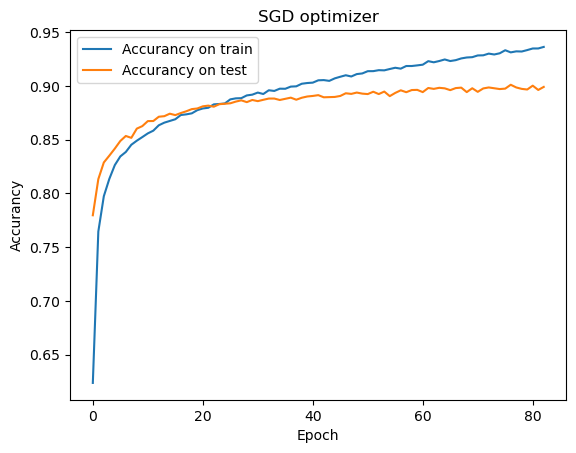

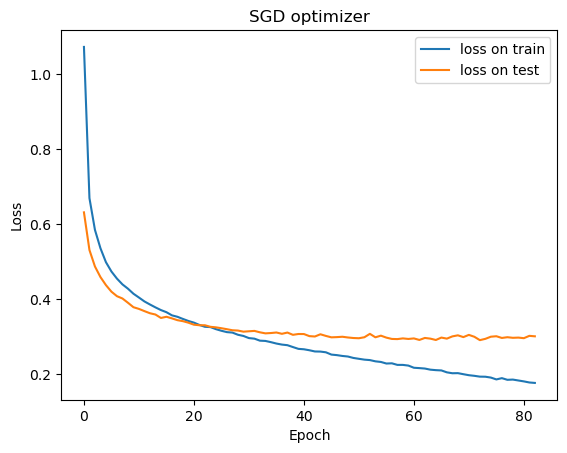

In [82]:
# Visualize result (accuracy and loss) for SGD optimazer

plt.plot(history_sgd.history['accuracy'], label='Accurancy on train')
plt.plot(history_sgd.history['val_accuracy'], label='Accurancy on test')
plt.xlabel('Epoch')
plt.ylabel('Accurancy')
plt.title('SGD optimizer')
plt.legend()
plt.show()

plt.plot(history_sgd.history['loss'], label='loss on train')
plt.plot(history_sgd.history['val_loss'], label='loss on test')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('SGD optimizer')
plt.legend()
plt.show()

### CNN

In [72]:
def create_model_cnn():
    return keras.Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

In [78]:
model_cnn = create_model_cnn()
# Compile the model
model_cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Summary of the model architecture
model_cnn.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_15 (Flatten)        (None, 1600)              0         
                                                                 
 dense_44 (Dense)            (None, 512)             

In [88]:
history = model_cnn.fit(train_x, train_y, batch_size=32, epochs=10, validation_data=(test_x, test_y),
                                     shuffle=True)

Epoch 1/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.4450 - accuracy: 0.8365 - val_loss: 0.3326 - val_accuracy: 0.8810
Epoch 2/10
1875/1875 [==============================] - 23s 13ms/step - loss: 0.3008 - accuracy: 0.8888 - val_loss: 0.2829 - val_accuracy: 0.8921
Epoch 3/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.2578 - accuracy: 0.9042 - val_loss: 0.2772 - val_accuracy: 0.8967
Epoch 4/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.2256 - accuracy: 0.9153 - val_loss: 0.2520 - val_accuracy: 0.9066
Epoch 5/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1997 - accuracy: 0.9245 - val_loss: 0.2601 - val_accuracy: 0.9064
Epoch 6/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1782 - accuracy: 0.9316 - val_loss: 0.2683 - val_accuracy: 0.9070
Epoch 7/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1596 - accuracy: 0.9395 - val_loss: 0.2710 -

In [90]:
# Find accuracy and loss for model SNN
test_loss, test_acc = model_cnn.evaluate(test_x, test_y)
print('Accurancy on test data optimizer_CNN', test_acc)
print('Loss on test data optimizer_CNN', test_loss)

train_loss, train_acc = model_cnn.evaluate(train_x, train_y)
print('Accurancy on train data optimizer_CNN:', train_acc)
print('Loss on train data optimizer_CNN:', train_loss)



313/313 [==============================] - 1s 4ms/step - loss: 0.2912 - accuracy: 0.9120
Accurancy on test data optimizer_CNN 0.9120000004768372
Loss on test data optimizer_CNN 0.29122892022132874
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0861 - accuracy: 0.9681
Accurancy on train data optimizer_CNN: 0.9681166410446167
Loss on train data optimizer_CNN: 0.08612586557865143


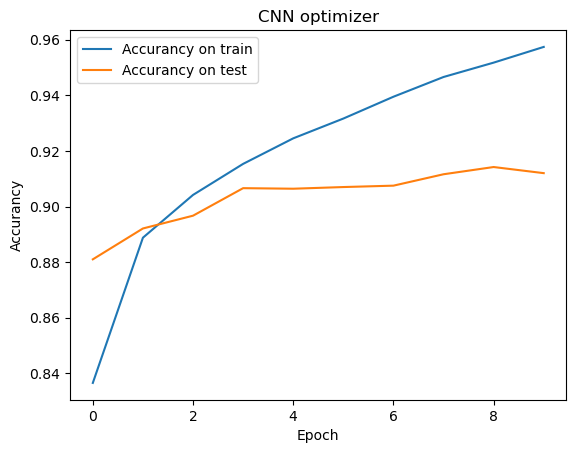

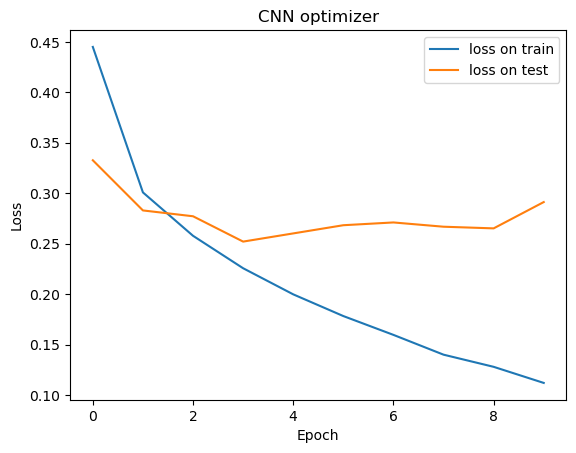

In [93]:
# Visualize result (accuracy and loss) for CNN optimazer

plt.plot(history.history['accuracy'], label='Accurancy on train')
plt.plot(history.history['val_accuracy'], label='Accurancy on test')
plt.xlabel('Epoch')
plt.ylabel('Accurancy')
plt.title('CNN optimizer')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='loss on train')
plt.plot(history.history['val_loss'], label='loss on test')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('CNN optimizer')
plt.legend()
plt.show()

### Conclusion

The most efficient model - **CNN**.

Over the course of 10 epochs, the model's loss consistently decreases, and its accuracy on the training data steadily increases, indicating that it is learning to fit the training data better. Additionally, the validation loss and accuracy metrics show a similar trend, with the model generalizing well to unseen data. By the end of training, the model achieves an accuracy of approximately **91.2%** on the test set, which is quite high and suggests that it can make accurate predictions on new, previously unseen data. 

However, the model's performance should also be evaluated on other relevant metrics, and further testing on a diverse range of data should be conducted to ensure its robustness and reliability in real-world applications.

### Test the CNN model

In [98]:
# list of class names
class_names = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot"
]



1/1 [==============================] - 0s 17ms/step
Image 1:
True Class: Pullover
Predicted Class: Pullover


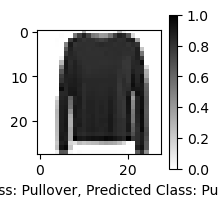

1/1 [==============================] - 0s 20ms/step
Image 2:
True Class: Shirt
Predicted Class: Coat


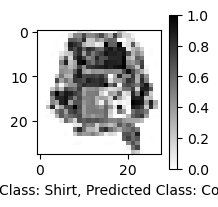

1/1 [==============================] - 0s 23ms/step
Image 3:
True Class: Shirt
Predicted Class: Shirt


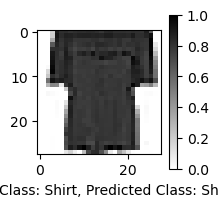

1/1 [==============================] - 0s 18ms/step
Image 4:
True Class: T-shirt/top
Predicted Class: T-shirt/top


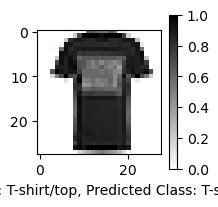

1/1 [==============================] - 0s 19ms/step
Image 5:
True Class: Pullover
Predicted Class: Pullover


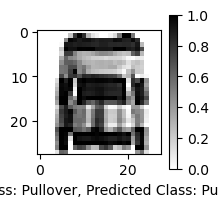

In [99]:
random_indices = np.random.choice(test_x.shape[0], 5, replace=False)

# Display each image along with its predicted and true classes
for i, idx in enumerate(random_indices):
    image = test_images[idx]
    true_label = test_labels[idx]

    # Predict the class of the image
    predictions = model_adam.predict(np.expand_dims(image, axis=0))
    predicted_label = np.argmax(predictions)

    print(f"Image {i+1}:")
    print("True Class:", class_names[true_label])
    print("Predicted Class:", class_names[predicted_label])

    plt.figure(figsize=(2, 2))
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(f"True Class: {class_names[true_label]}, Predicted Class: {class_names[predicted_label]}")
    plt.colorbar()
    plt.show()